In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stockdata as sd

In [16]:
start_season = '2021-01-01'
dftotal = sd.load_jibenmian(start_season)

season_select = '20221231'
df = dftotal[dftotal['DATE'] == season_select]

stock = 603065
# dftotal[(dftotal['DATE'] == season_select) & (dftotal['股票代码'] == stock)]



2023-01-05


,stockId
0,600079
1,300201
2,688020
3,2224
4,600243
...,...
1222,815
1223,603065
1224,301059
1225,603073


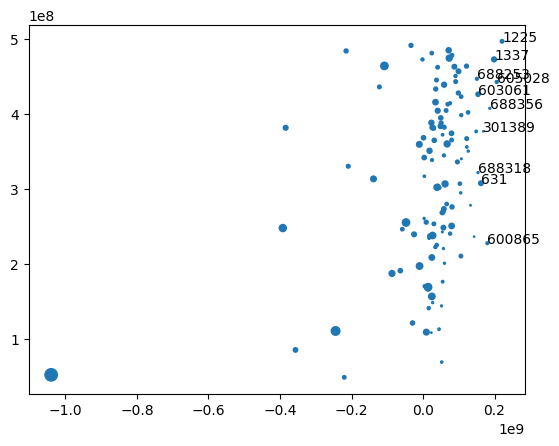

In [14]:
df = df[df['营业总收入']<5e+8]   # 

plt.scatter(df['净利润'], df['营业总收入'], s=df['资产负债率']/3)
for i in range(len(df)):
    # Check if the point is an outlier
    if df.iloc[i]['净利润'] > 1.5e+8:
        # Annotate the point with its name
        plt.annotate(df.iloc[i]['股票代码'], (df.iloc[i]['净利润'], df.iloc[i]['营业总收入']))

plt.show()
